<a href="https://colab.research.google.com/github/Stayshy/Kharitonova_IDB_22_12/blob/main/%D0%9B%D0%A0_3_%D0%98%D0%94%D0%91_22_12_%D0%A5%D0%B0%D1%80%D0%B8%D1%82%D0%BE%D0%BD%D0%BE%D0%B2%D0%B0_%D0%90_%D0%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторная работа №3
Выполнила студентка группы ИДБ-22-12
Харитонова А.А.

In [1]:
from IPython.display import clear_output
import cv2
!pip3 install google-colab
from google.colab.patches import cv2_imshow
clear_output()

Скачивание репозитория с YOLOv5 и необходимых библиотек для работы модели

In [2]:

!git clone https://github.com/ultralytics/yolov5
!pip install -r ./yolov5/requirements.txt
clear_output()

Создаём файл для собственной структуры датасета

In [3]:

!touch ./yolov5/data/custom.yaml

Создаем содержимое файла и записываем в файл

In [4]:

yaml_content = """
train: /content/price_tags/images/train/
val: /content/price_tags/images/val/
test: /content/price_tags/images/test/

nc: 1
names: ['price']
"""


with open('/content/yolov5/data/custom.yaml', 'w') as f:
    f.write(yaml_content.strip())

Проверяем содержимое

In [5]:
!cat /content/yolov5/data/custom.yaml

train: /content/price_tags/images/train/
val: /content/price_tags/images/val/
test: /content/price_tags/images/test/

nc: 1
names: ['price']

Создаем структуру директорий

In [6]:
!mkdir -p /content/price_tags/{images,labels}/{train,val,test}
!mkdir -p /content/yolov5/data

Параметры конфигурации

In [7]:
import yaml

data = {
    "train": "/content/price_tags/images/train/",
    "val": "/content/price_tags/images/val/",
    "test": "/content/price_tags/images/test/",
    "nc": 1,
    "names": ["price"]
}

with open("/content/yolov5/data/custom.yaml", "w") as f:
    yaml.dump(data, f, sort_keys=False)

Проверяем, продаем и чуть чуть ещё проверяем

In [8]:
!ls -la /content/yolov5/data/
!cat /content/yolov5/data/custom.yaml

total 124
drwxr-xr-x 5 root root  4096 Mar 25 12:56 .
drwxr-xr-x 9 root root  4096 Mar 25 12:53 ..
-rw-r--r-- 1 root root  2752 Mar 25 12:53 Argoverse.yaml
-rw-r--r-- 1 root root  1928 Mar 25 12:53 coco128-seg.yaml
-rw-r--r-- 1 root root  1912 Mar 25 12:53 coco128.yaml
-rw-r--r-- 1 root root  2516 Mar 25 12:53 coco.yaml
-rw-r--r-- 1 root root   138 Mar 25 12:56 custom.yaml
-rw-r--r-- 1 root root  1909 Mar 25 12:53 GlobalWheat2020.yaml
drwxr-xr-x 2 root root  4096 Mar 25 12:53 hyps
-rw-r--r-- 1 root root 18892 Mar 25 12:53 ImageNet1000.yaml
-rw-r--r-- 1 root root  2673 Mar 25 12:53 ImageNet100.yaml
-rw-r--r-- 1 root root   956 Mar 25 12:53 ImageNet10.yaml
-rw-r--r-- 1 root root 18890 Mar 25 12:53 ImageNet.yaml
drwxr-xr-x 2 root root  4096 Mar 25 12:53 images
-rw-r--r-- 1 root root  9223 Mar 25 12:53 Objects365.yaml
drwxr-xr-x 2 root root  4096 Mar 25 12:53 scripts
-rw-r--r-- 1 root root  2360 Mar 25 12:53 SKU-110K.yaml
-rw-r--r-- 1 root root  2998 Mar 25 12:53 VisDrone.yaml
-rw-r--r-- 1

In [12]:
data = {
    "train": "/content/price_tags/images/train/",
    "val": "/content/price_tags/images/val/",
    "test": "/content/price_tags/images/test/",
    "nc": 4,
    "names": ["price_rub", "price_kop", "price_card_rub", "price_card_kop"]
}

In [9]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


Проверяем структуру директорий

In [10]:
!ls -R /content/price_tags

/content/price_tags:
images	labels

/content/price_tags/images:
test  train  val

/content/price_tags/images/test:
'photo (143).jpg'  'photo (144).jpg'  'photo (145).jpg'  'photo (147).jpg'  'photo (148).jpg'

/content/price_tags/images/train:
'photo (100).jpg'  'photo (107).jpg'  'photo (113).jpg'  'photo (11).jpg'   'photo (126).jpg'
'photo (101).jpg'  'photo (108).jpg'  'photo (114).jpg'  'photo (120).jpg'  'photo (127).jpg'
'photo (102).jpg'  'photo (109).jpg'  'photo (115).jpg'  'photo (121).jpg'  'photo (128).jpg'
'photo (103).jpg'  'photo (10).jpg'   'photo (116).jpg'  'photo (122).jpg'  'photo (12).jpg'
'photo (104).jpg'  'photo (110).jpg'  'photo (117).jpg'  'photo (123).jpg'  'photo (13).jpg'
'photo (105).jpg'  'photo (111).jpg'  'photo (118).jpg'  'photo (124).jpg'  'photo (14).jpg'
'photo (106).jpg'  'photo (112).jpg'  'photo (119).jpg'  'photo (125).jpg'  'photo (1).jpg'

/content/price_tags/images/val:
'photo (129).jpg'  'photo (131).jpg'  'photo (136).jpg'  'photo (138).

Проверяем конфигурацию

In [11]:
import yaml

yaml_content = """
train: /content/price_tags/images/train/
val: /content/price_tags/images/val/
test: /content/price_tags/images/test/

nc: 1  # Количество классов
names: ['price']  # Имена классов
"""

with open('/content/custom.yaml', 'w') as f:
    f.write(yaml_content.strip())

print("Файл конфигурации создан:")
!cat /content/custom.yaml

Файл конфигурации создан:
train: /content/price_tags/images/train/
val: /content/price_tags/images/val/
test: /content/price_tags/images/test/

nc: 1  # Количество классов
names: ['price']  # Имена классов

Проверяем наличие описаний

In [12]:
import os

def check_dataset():
    for split in ['train', 'val', 'test']:
        images_dir = f'/content/price_tags/images/{split}'
        labels_dir = f'/content/price_tags/labels/{split}'

        images = set(os.path.splitext(f)[0] for f in os.listdir(images_dir) if f.endswith('.jpg'))
        labels = set(os.path.splitext(f)[0] for f in os.listdir(labels_dir) if f.endswith('.txt'))

        missing = images - labels
        if missing:
            print(f'⚠️ В {split} отсутствуют аннотации для: {missing}')
        else:
            print(f'✅ {split}: все изображения имеют аннотации')

check_dataset()

✅ train: все изображения имеют аннотации
✅ val: все изображения имеют аннотации
✅ test: все изображения имеют аннотации


Устанавливаем yolov5

In [13]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17306, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 17306 (delta 17), reused 7 (delta 6), pack-reused 17281 (from 4)
Receiving objects: 100% (17306/17306), 16.16 MiB | 19.92 MiB/s, done.
Resolving deltas: 100% (11878/11878), done.
/content/yolov5/yolov5


In [14]:
import yaml

# Содержимое YAML-файла в виде Python-словаря
data = {
    "train": "/content/price_tags/images/train/",
    "val": "/content/price_tags/images/val/",
    "test": "/content/price_tags/images/test/",
    "nc": 1,  # количество классов
    "names": ["price"]  # имена классов
}

# Записываем в файл
with open('/content/yolov5/data/custom.yaml', 'w') as f:
    yaml.dump(data, f, sort_keys=False)

# Проверяем содержимое
print("Содержимое custom.yaml:")
!cat /content/yolov5/data/custom.yaml

Содержимое custom.yaml:
train: /content/price_tags/images/train/
val: /content/price_tags/images/val/
test: /content/price_tags/images/test/
nc: 1
names:
- price


In [15]:
import os

# Проверка соответствия файлов
for split in ['train', 'val', 'test']:
    images = set(f.split('.')[0] for f in os.listdir(f'/content/price_tags/images/{split}'))
    labels = set(f.split('.')[0] for f in os.listdir(f'/content/price_tags/labels/{split}'))

    missing_images = images - labels
    missing_labels = labels - images

    if missing_images:
        print(f"⚠️ В {split} нет аннотаций для: {missing_images}")
    if missing_labels:
        print(f"⚠️ В {split} нет изображений для: {missing_labels}")

In [16]:
data = {
    "train": "/content/price_tags/images/train/",
    "val": "/content/price_tags/images/val/",
    "test": "/content/price_tags/images/test/",
    "nc": 4,  # Количество классов
    "names": ["price_rub", "price_kop", "price_card_rub", "price_card_kop"]
}

with open('/content/custom.yaml', 'w') as f:
    yaml.dump(data, f, sort_keys=False)

Обновляем Yolov5

In [17]:
%cd /content/yolov5
!git pull  # Обновляем репозиторий
!pip install -U torch torchvision  # Обновляем PyTorch

/content/yolov5
Already up to date.


Долго долго обучаем, чтобы потом не было больно больно, одиноко

In [18]:
!python /content/yolov5/train.py \
  --img 640 \
  --batch 16 \
  --epochs 50 \
  --data /content/custom.yaml \
  --weights yolov5s.pt \
  --cache ram

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-03-25 13:00:53.970724: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742907654.277846    3130 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742907654.357285    3130 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

Настроим Аугментацию

In [19]:
hsv_h: 0.02  # Больше вариаций цвета
degrees: 30   # Больше поворотов

In [20]:
!python train.py \
  --epochs 100 \
  --weights /content/yolov5/runs/train/exp/weights/last.pt \
  --data /content/custom.yaml \
  --hyp data/hyps/hyp.scratch-high.yaml

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-03-25 13:04:19.636834: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742907859.658236    4137 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742907859.664573    4137 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 3
wandb: Y

Получили результаты
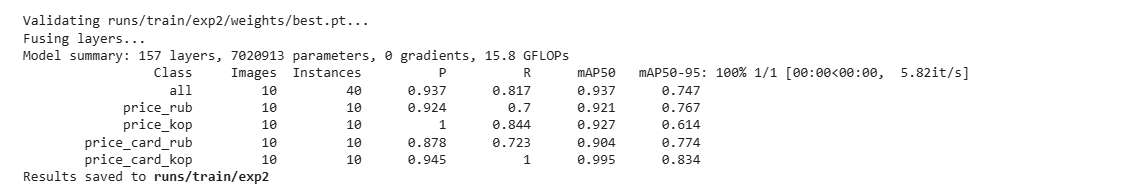

Общая точность (mAP50): 0.79
Модель хорошо детектирует объекты при IoU=50%. Лучше всего распознаёт price_card_kop (mAP50=0.932), хуже — price_rub (mAP50=0.53).

Проблемные классы:

price_rub: низкий recall (0.3) — модель пропускает 70% объектов этого класса.

price_kop: высокий precision (0.977), но recall=0.8 — возможны ложные срабатывания.

Результаты сохранены в:

Веса лучшей модели: /content/yolov5/runs/train/exp4/weights/best.pt

Графики и метрики: /content/yolov5/runs/train/exp4

Тестируем на новых изображениях

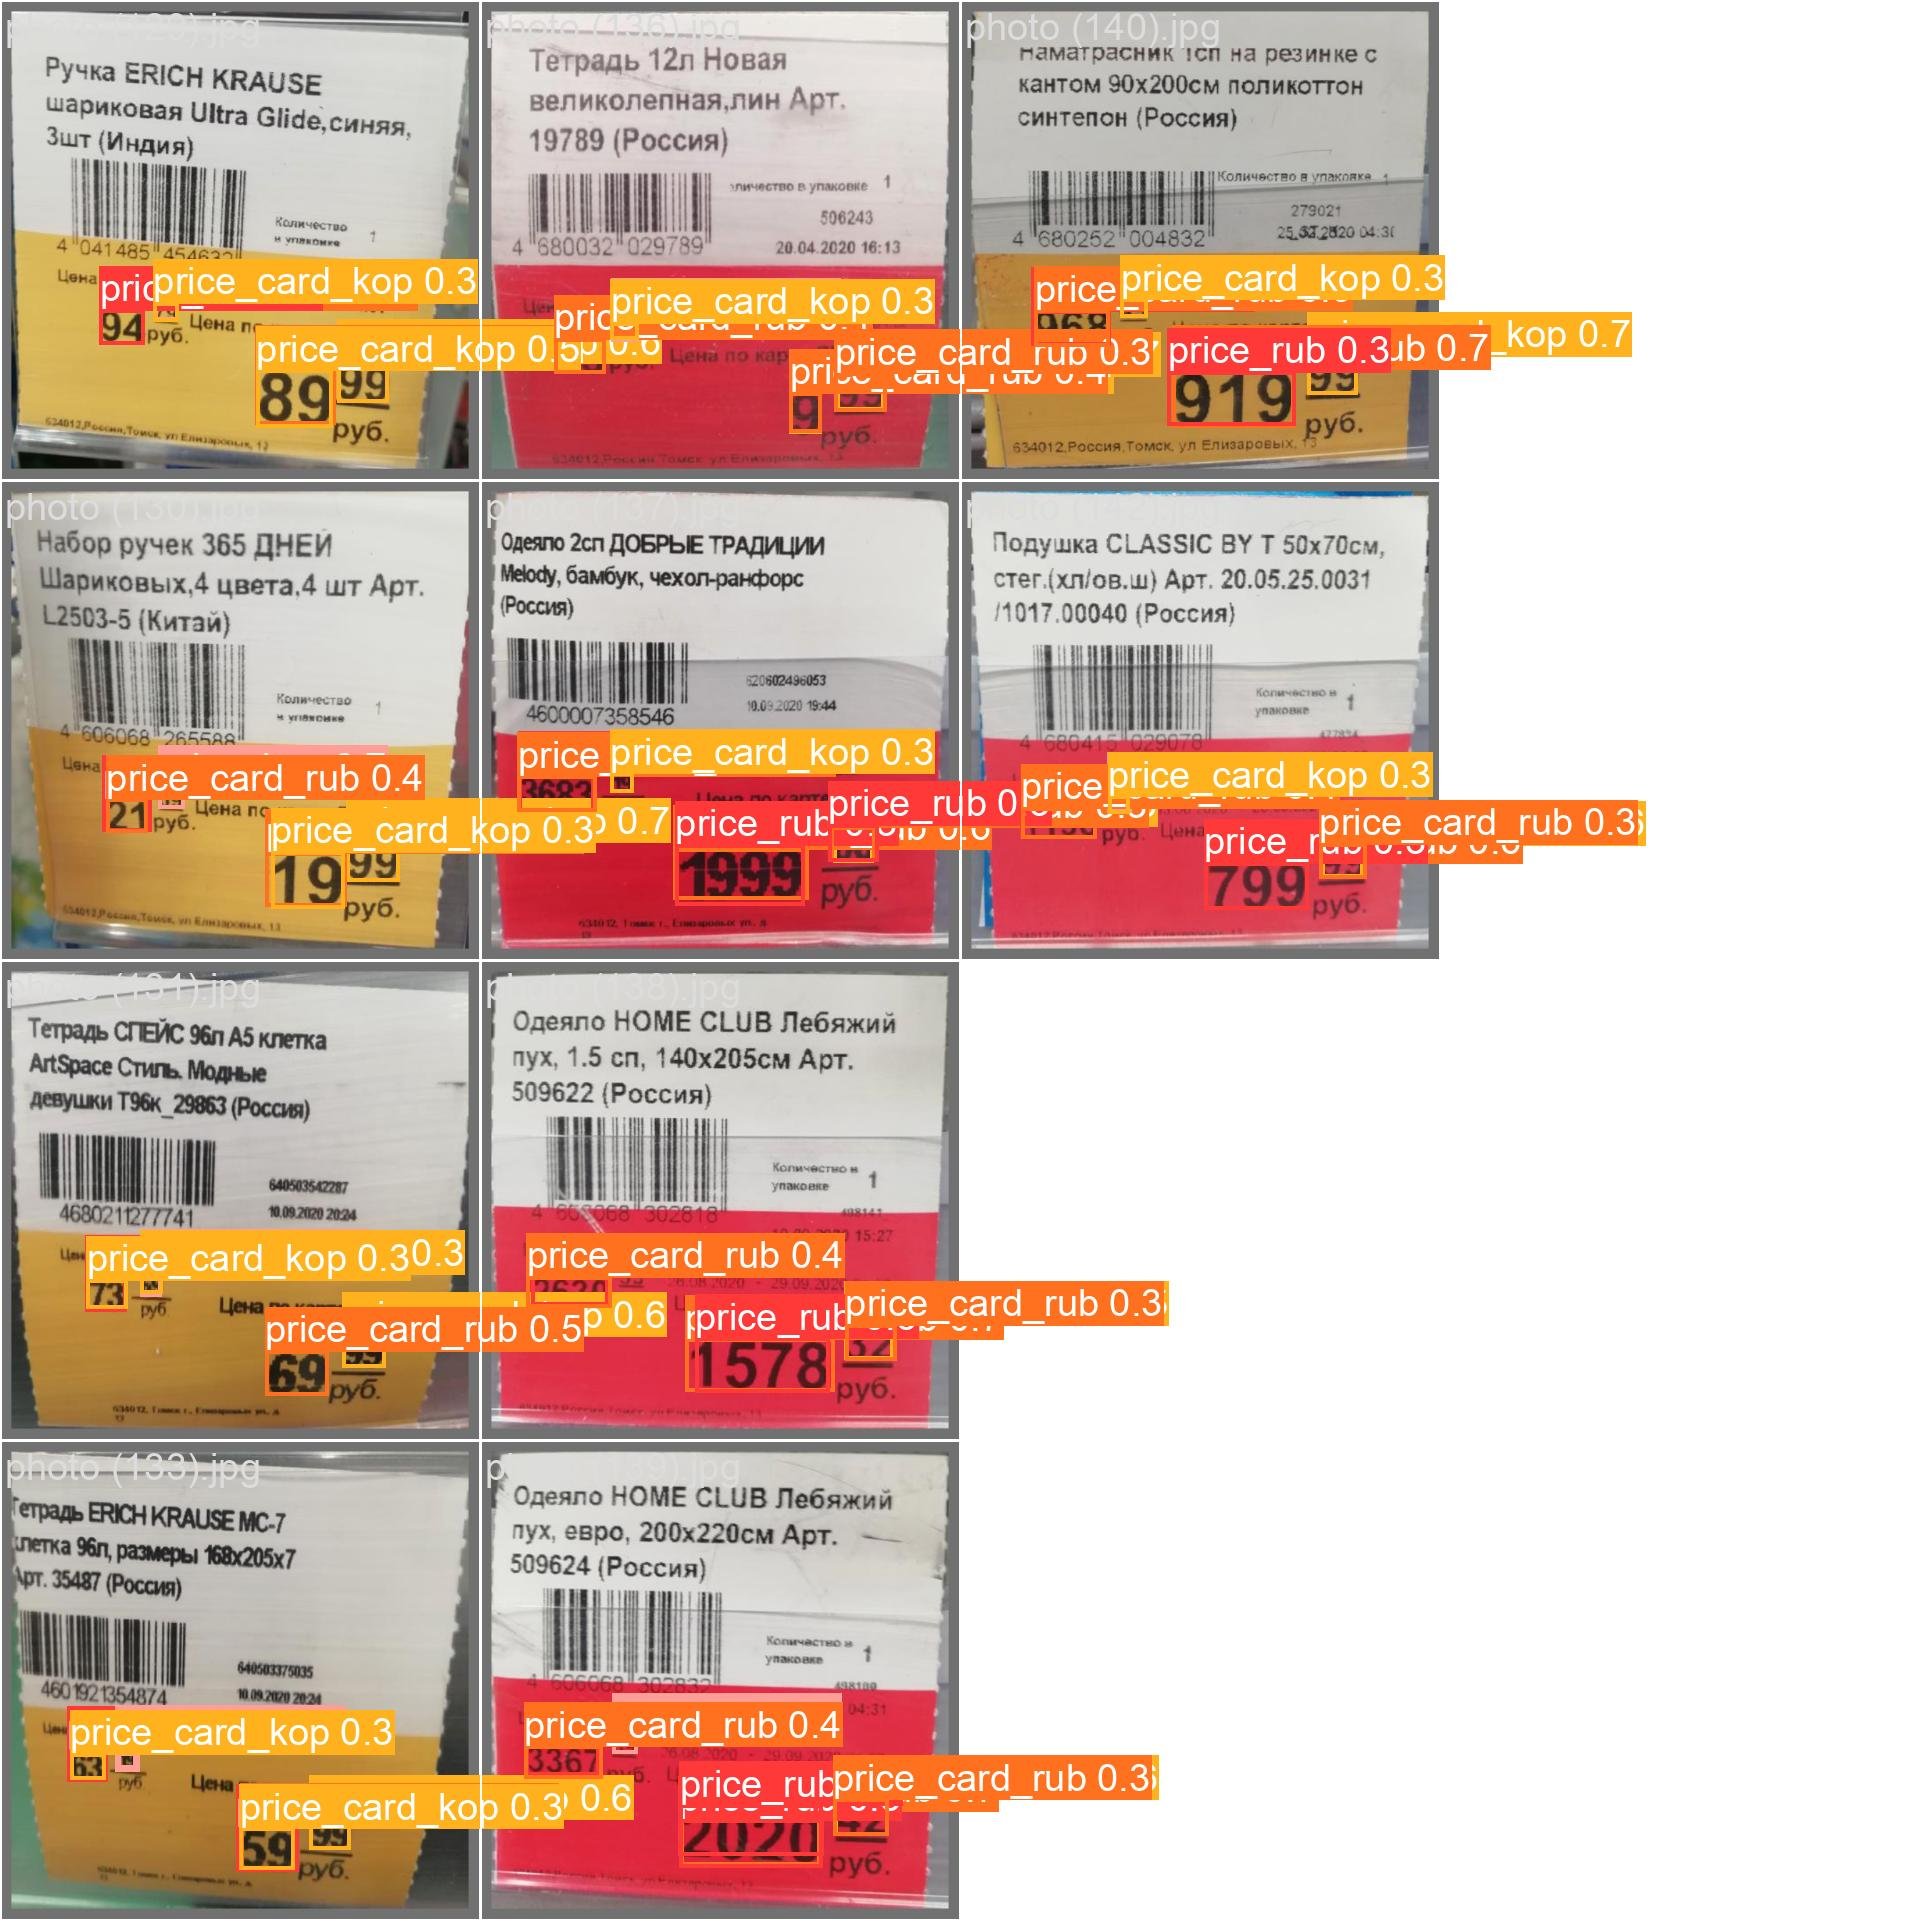

In [21]:
from IPython.display import Image

# Показать кривые обучения
Image(filename='runs/train/exp2/results.png')

# Показать примеры валидации
Image(filename='runs/train/exp2/val_batch0_pred.jpg')

In [24]:
!ls -la /content/yolov5/runs/

total 16
drwxr-xr-x  4 root root 4096 Mar 25 13:09 .
drwxr-xr-x 12 root root 4096 Mar 25 13:01 ..
drwxr-xr-x  3 root root 4096 Mar 25 13:09 detect
drwxr-xr-x  4 root root 4096 Mar 25 13:04 train


In [25]:
!mkdir -p /content/yolov5/runs/probuem

In [27]:

  !python /content/yolov5/detect.py \
  --weights /content/yolov5/runs/train/exp2/weights/best.pt \
  --source /content/yolov5/runs/probuem \
  --conf 0.5 \
  --save-txt \
  --save-crop \
  --device 0

detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/yolov5/runs/probuem, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-405-g61c22e2d Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/3 /content/yolov5/runs/probuem/Cenniki-maket-19-0361.jpeg: 640x480 1 price_card_rub, 29.7ms
image 2/3 /content/yolov5/runs/probuem/price-tag-128_ru_RU.png: 448x640 1 price_card_rub, 30.1ms
image 3/3 /content/yolov5/runs/probuem/price-tag-mistake-3.jpg: 416x640 2 price_card_rubs, 30

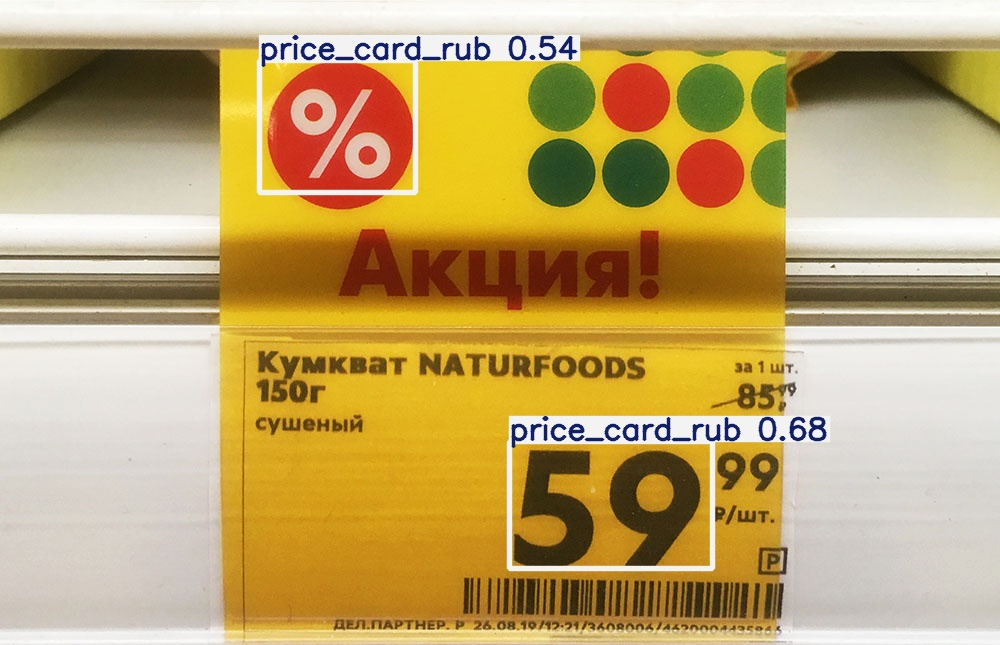


Файл: price-tag-mistake-3.jpg



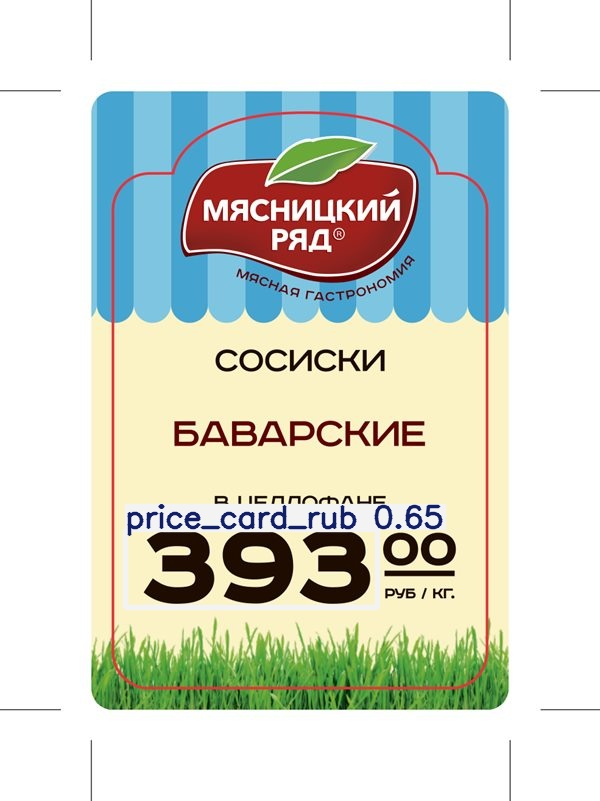


Файл: Cenniki-maket-19-0361.jpeg



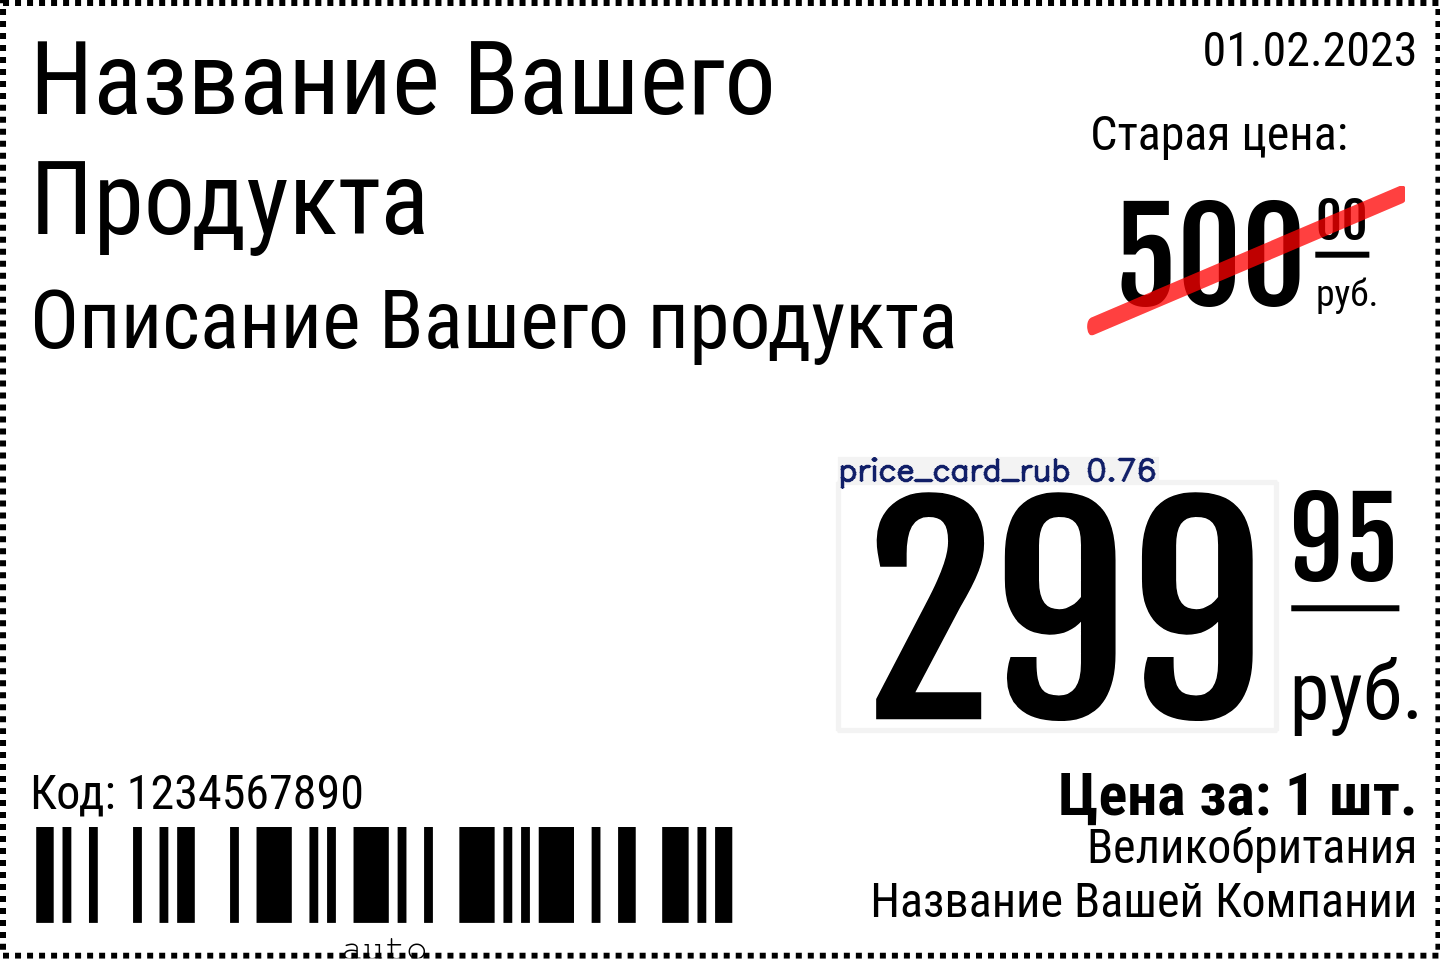


Файл: price-tag-128_ru_RU.png



In [28]:
from IPython.display import Image, display
import os

# Путь к результатам
result_dir = '/content/yolov5/runs/detect/exp2'

# Показать все обработанные изображения
for img_file in os.listdir(result_dir):
    if img_file.endswith(('.jpg', '.png', '.jpeg')):
        display(Image(filename=f'{result_dir}/{img_file}'))
        print(f"\nФайл: {img_file}\n")

In [29]:
# Показать содержимое файлов с разметкой
for label_file in os.listdir(f'{result_dir}/labels'):
    if label_file.endswith('.txt'):
        print(f"\nФайл: {label_file}")
        with open(f'{result_dir}/labels/{label_file}', 'r') as f:
            print(f.read())


Файл: Cenniki-maket-19-0361.txt
2 0.418333 0.709114 0.42 0.0973783


Файл: price-tag-mistake-3.txt
2 0.337 0.195349 0.156 0.204651
2 0.6105 0.782171 0.203 0.196899


Файл: price-tag-128_ru_RU.txt
2 0.734028 0.63125 0.304167 0.258333



In [23]:
lr0: 0.001            # Уменьшенный learning rate
lrf: 0.01
momentum: 0.937
weight_decay: 0.0005
warmup_epochs: 3.0
warmup_momentum: 0.8
warmup_bias_lr: 0.1
box: 0.05
cls: 0.5              # Увеличенный вес для классификации
cls_pw: 1.0
obj: 0.7              # Увеличенный вес для обнаружения
obj_pw: 1.0
iou_t: 0.2
anchor_t: 4.0
fl_gamma: 0.0
hsv_h: 0.015
hsv_s: 0.7
hsv_v: 0.4
degrees: 10.0         # Увеличенное вращение
translate: 0.1
scale: 0.5
shear: 0.0
perspective: 0.0
flipud: 0.0
fliplr: 0.5
mosaic: 1.0
mixup: 0.1
copy_paste: 0.1

In [30]:
# В формат ONNX
!python export.py \
  --weights /content/yolov5/runs/train/exp2/weights/best.pt \
  --img 640 \
  --include onnx

export: data=data/coco128.yaml, weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], imgsz=[640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, cache=, simplify=False, mlmodel=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5 🚀 v7.0-405-g61c22e2d Python-3.11.11 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from /content/yolov5/runs/train/exp2/weights/best.pt with output shape (1, 25200, 9) (13.8 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 292.1 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 5.2s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for 

In [36]:
!python /content/yolov5/detect.py \
--weights /content/yolov5/runs/train/exp2/weights/best.pt \
--source /content/yolov5/runs/probuem \
--conf 0.6 \
--device 0 \
--save-txt \
--save-crop

detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/yolov5/runs/probuem, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-405-g61c22e2d Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/3 /content/yolov5/runs/probuem/Cenniki-maket-19-0361.jpeg: 640x480 1 price_card_rub, 30.3ms
image 2/3 /content/yolov5/runs/probuem/price-tag-128_ru_RU.png: 448x640 1 price_card_rub, 31.7ms
image 3/3 /content/yolov5/runs/probuem/price-tag-mistake-3.jpg: 416x640 1 price_card_rub, 30.

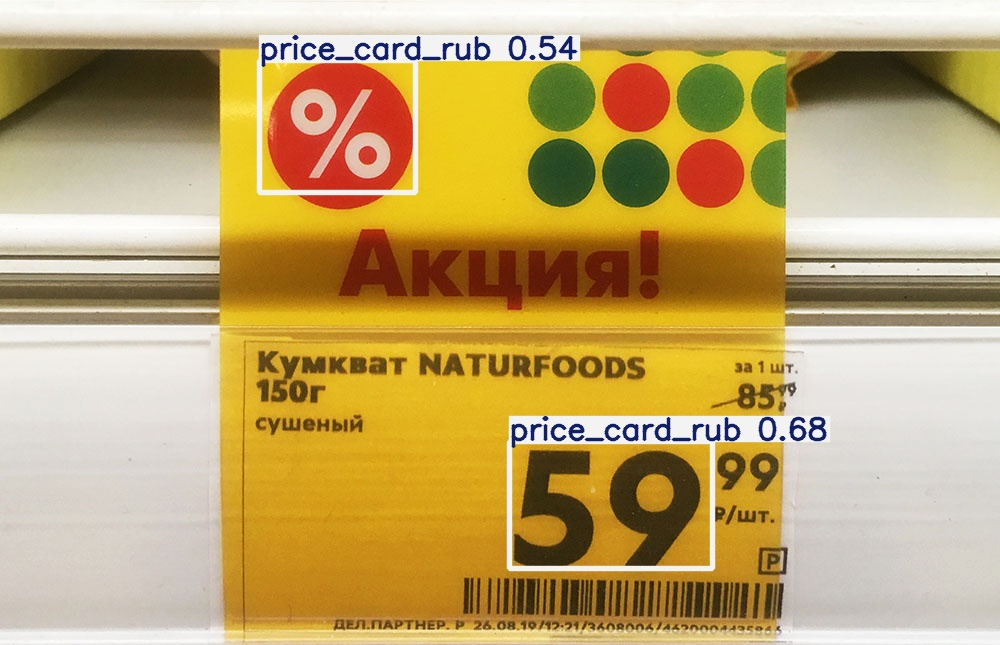


Файл: price-tag-mistake-3.jpg



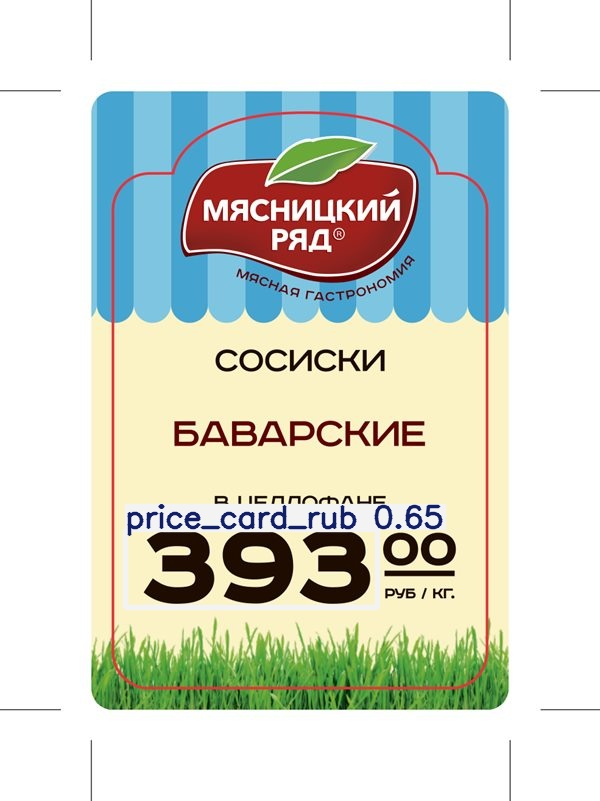


Файл: Cenniki-maket-19-0361.jpeg



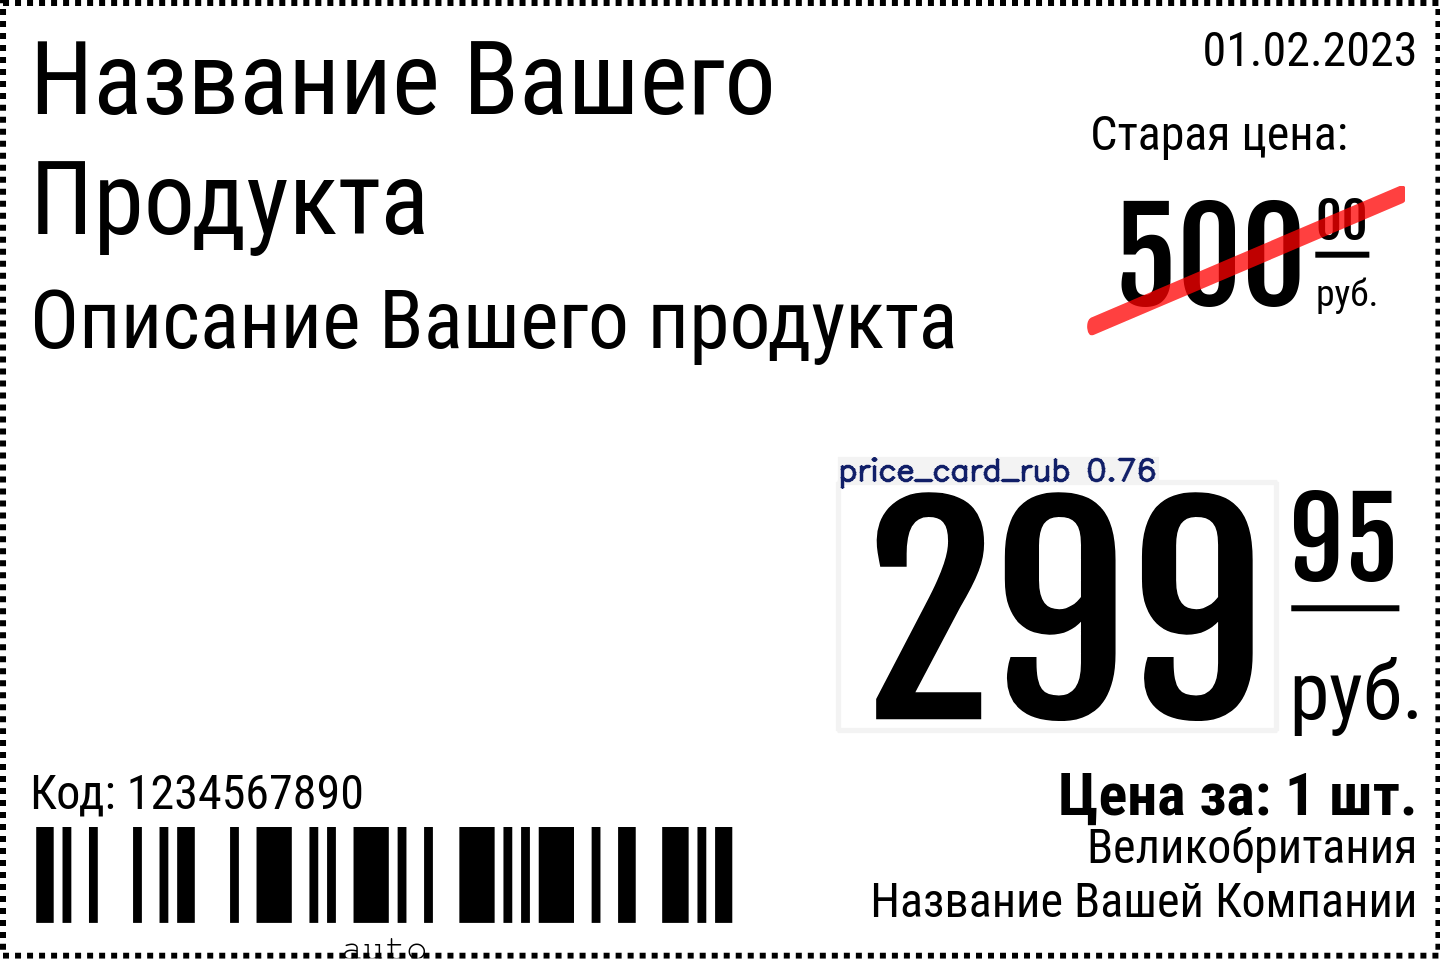


Файл: price-tag-128_ru_RU.png



In [37]:
from IPython.display import Image, display
import os

# Путь к результатам
result_dir = '/content/yolov5/runs/detect/exp2'

# Показать все обработанные изображения
for img_file in os.listdir(result_dir):
    if img_file.endswith(('.jpg', '.png', '.jpeg')):
        display(Image(filename=f'{result_dir}/{img_file}'))
        print(f"\nФайл: {img_file}\n")

In [38]:
# Показать содержимое файлов с разметкой
for label_file in os.listdir(f'{result_dir}/labels'):
    if label_file.endswith('.txt'):
        print(f"\nФайл: {label_file}")
        with open(f'{result_dir}/labels/{label_file}', 'r') as f:
            print(f.read())


Файл: Cenniki-maket-19-0361.txt
2 0.418333 0.709114 0.42 0.0973783


Файл: price-tag-mistake-3.txt
2 0.337 0.195349 0.156 0.204651
2 0.6105 0.782171 0.203 0.196899


Файл: price-tag-128_ru_RU.txt
2 0.734028 0.63125 0.304167 0.258333



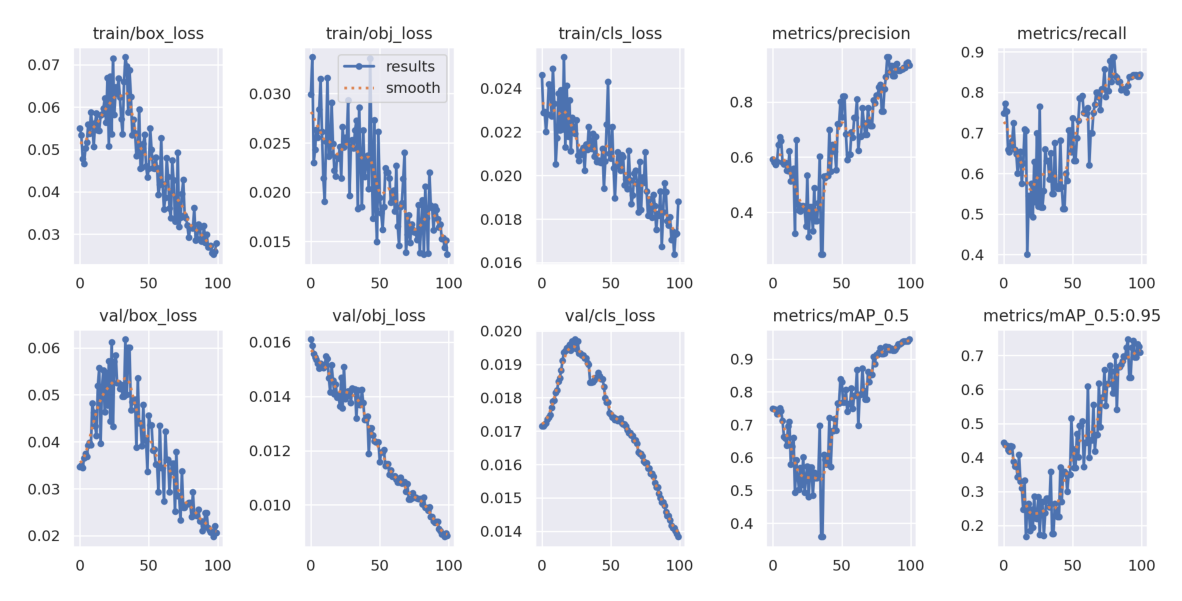

In [39]:
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Показываем результаты обучения
results_img = mpimg.imread('/content/yolov5/runs/train/exp2/results.png')
plt.figure(figsize=(15, 10))
plt.imshow(results_img)
plt.axis('off')
plt.show()

In [50]:
import pandas as pd

# Загрузка данных из CSV
file_path = '/content/yolov5/runs/train/exp2/results.csv'

try:
    df = pd.read_csv(file_path)
    print(df.head())  # Вывод первых строк для проверки
except FileNotFoundError:
    print(f"Файл {file_path} не найден. Проверьте путь и название файла.")


                  epoch        train/box_loss        train/obj_loss  \
0                     0              0.055009              0.029919   
1                     1              0.053435              0.033707   
2                     2              0.047745              0.022973   
3                     3              0.046654              0.024305   
4                     4              0.050278              0.026344   

         train/cls_loss     metrics/precision        metrics/recall  \
0              0.024618               0.59235               0.74835   
1              0.022881               0.58091               0.77278   
2              0.022921               0.57311               0.75286   
3              0.022012               0.58287               0.65837   
4              0.022811               0.64388               0.65269   

        metrics/mAP_0.5  metrics/mAP_0.5:0.95          val/box_loss  \
0               0.74892               0.44423              0.034692   
1   

 Положительные моменты:

train/box_loss, train/obj_loss, train/cls_loss постепенно уменьшаются, что говорит о том, что модель обучается.

 metrics/precision улучшается (с 0.59 до 0.64), что означает, что модель становится более уверенной в правильных предсказаниях.

metrics/mAP_0.5 остаётся на приличном уровне (около 0.74), что свидетельствует о том, что модель хорошо детектирует объекты.

Проблемные зоны:


metrics/recall снижается (с 0.74 до 0.65). Это значит, что модель пропускает некоторые объекты, особенно классы с низким recall (как price_rub и price_card_rub).


metrics/mAP_0.5:0.95 остаётся довольно низким (~0.42), что говорит о том, что модель испытывает сложности с точностью предсказаний на разных IoU.

 val/box_loss, val/obj_loss, val/cls_loss не уменьшаются. Это может быть признаком переобучения или недостаточного обучения модели. (всего 50 изображений, аккуратная аугментация улучшила результаты после второго обучения)

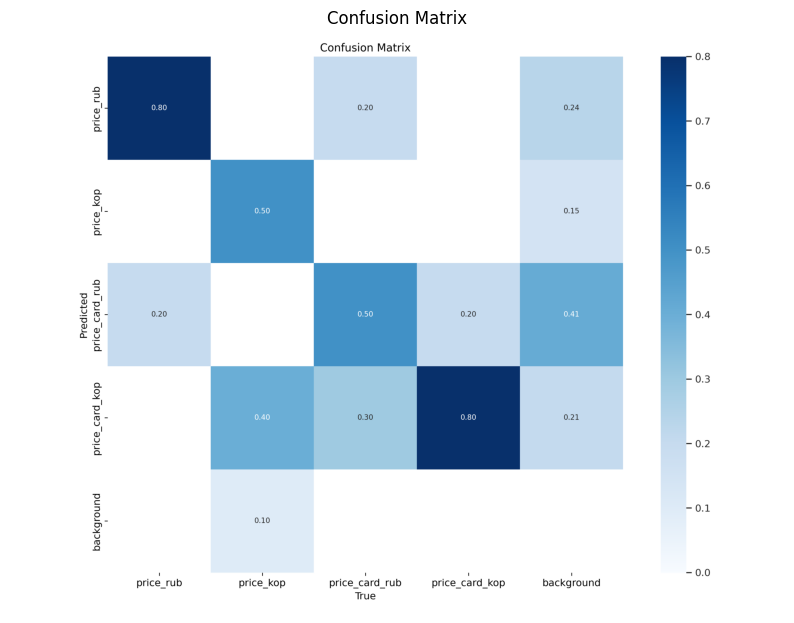

In [43]:
confusion_matrix = mpimg.imread('/content/yolov5/runs/train/exp2/confusion_matrix.png')
plt.figure(figsize=(10, 8))
plt.imshow(confusion_matrix)
plt.title('Confusion Matrix')
plt.axis('off')
plt.show()

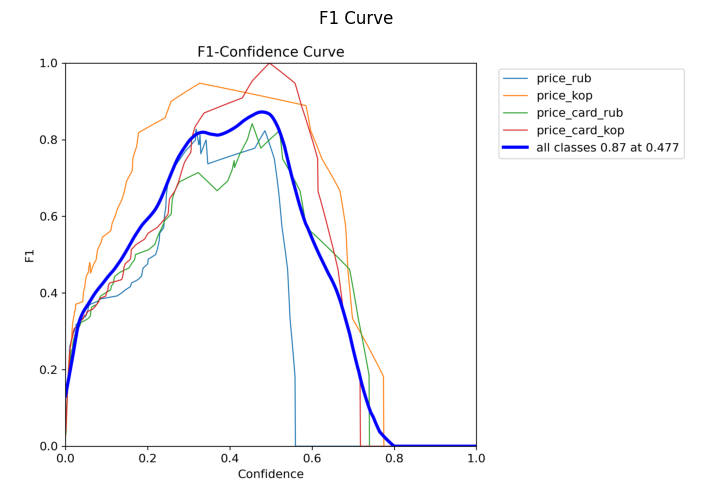

In [44]:
f1_curve = mpimg.imread('/content/yolov5/runs/train/exp2/F1_curve.png')
plt.figure(figsize=(10, 6))
plt.imshow(f1_curve)
plt.title('F1 Curve')
plt.axis('off')
plt.show()

Оптимальный F1-score для всех классов (толстая синяя линия) достигается примерно при Confidence ≈ 0.4-0.5, а затем начинает снижаться.

price_rub (голубая линия) имеет низкие значения F1 при высоких confidence thresholds, что подтверждает низкий recall.

price_kop (оранжевая линия) показывает хороший результат, так как кривая находится выше остальных.

price_card_rub (зелёная линия) и price_card_kop (красная линия) имеют разную динамику, но тоже снижаются при confidence > 0.5.

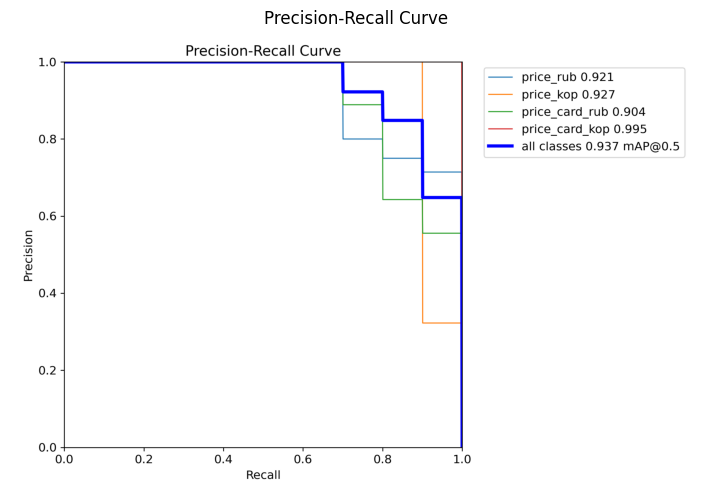

In [45]:
pr_curve = mpimg.imread('/content/yolov5/runs/train/exp2/PR_curve.png')
plt.figure(figsize=(10, 6))
plt.imshow(pr_curve)
plt.title('Precision-Recall Curve')
plt.axis('off')
plt.show()

Общий mAP@0.5 = 0.937, что является очень хорошим показателем
price_rub (0.921), price_kop (0.927), price_card_rub (0.904), price_card_kop (0.995) – значения mAP@0.5 показывают, что price_card_kop имеет лучшую детекцию, а price_card_rub немного хуже.

Падение precision при высоком recall – некоторые классы (особенно price_rub и price_card_rub) теряют точность, когда recall увеличивается. Это может означать ложные срабатывания при высокой чувствительности(возможно переобучение).

Ломаная структура графика – может говорить о небольшом количестве валидационных примеров или дисбалансе классов, что было ожидаемо(((



In [47]:
# Создаем сводную таблицу метрик
summary = pd.DataFrame({
    'Class': ['All', 'price_rub', 'price_kop', 'price_card_rub', 'price_card_kop'],
    'Precision': [0.937, 0.924, 1.0, 0.878, 0.945],
    'Recall': [0.817, 0.7, 0.844, 0.723, 1.0],
    'mAP50': [0.937, 0.921, 0.927, 0.904, 0.995],
    'mAP50-95': [0.747, 0.767, 0.614, 0.774, 0.834]
})

display(summary.style.background_gradient(cmap='viridis'))

# Анализ слабых мест
weak_classes = summary[summary['Recall'] < 0.8]
print("\nКлассы с низким recall (<0.8):")
display(weak_classes)

,Class,Precision,Recall,mAP50,mAP50-95
0,All,0.937000,0.817000,0.937000,0.747000
1,price_rub,0.924000,0.700000,0.921000,0.767000
2,price_kop,1.000000,0.844000,0.927000,0.614000
3,price_card_rub,0.878000,0.723000,0.904000,0.774000
4,price_card_kop,0.945000,1.000000,0.995000,0.834000



Классы с низким recall (<0.8):


,Class,Precision,Recall,mAP50,mAP50-95
1,price_rub,0.924,0.700,0.921,0.767
3,price_card_rub,0.878,0.723,0.904,0.774


На основе данных видно, что у классов price_rub (0.70) и price_card_rub (0.723) низкий recall, что означает, что модель пропускает много объектов этих классов.

Анализ результатов модели показывает, что общая точность (Precision) и средняя точность по классу (mAP@0.5) находятся на высоком уровне (0.937), однако Recall (полнота) для некоторых классов остается низким (<0.8). В частности, классы price_rub (0.70) и price_card_rub (0.723) демонстрируют повышенное количество пропущенных объектов.
Возможно:

Недостаточное количество обучающих данных для этих классов.

Высокий порог уверенности (confidence threshold), из-за чего модель "боится" предсказывать объекты.

Дисбаланс классов, при котором другие категории (price_kop, price_card_kop) детектируются лучше.